In [12]:
# 載入相關套件
import numpy as np       #數學處理
import pandas as pd       #資料處理
import matplotlib.pyplot as plt #繪圖
import seaborn as sns

In [13]:
data=pd.read_csv('train_dataset.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
451,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
452,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
453,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# 缺失值、異常值處理
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     455 non-null    float64
 1   ZN       455 non-null    float64
 2   INDUS    455 non-null    float64
 3   CHAS     455 non-null    int64  
 4   NOX      455 non-null    float64
 5   RM       455 non-null    float64
 6   AGE      455 non-null    float64
 7   DIS      455 non-null    float64
 8   RAD      455 non-null    int64  
 9   TAX      455 non-null    int64  
 10  PIRATIO  455 non-null    float64
 11  B        455 non-null    float64
 12  LSTAT    455 non-null    float64
 13  PRICE    455 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 49.9 KB


In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PIRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

沒有缺失值、異常值

In [14]:
d = pd.DataFrame(data) #特徵只有一個欄位:x
# 查看資料分布狀況
d.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.989784,10.912088,11.664110,0.072527,0.561758,6.263266,70.344835,3.664227,10.092308,420.778022,18.519780,353.272593,12.963385,22.212308
std,8.993398,23.130233,6.974787,0.259645,0.118627,0.704493,27.697196,2.118137,9.002217,172.326926,2.165215,95.557626,7.239069,9.241754
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.500000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084170,0.000000,5.190000,0.000000,0.453000,5.877500,47.200000,2.005550,4.000000,281.000000,17.400000,372.860000,7.205000,16.450000
50%,0.289600,0.000000,10.010000,0.000000,0.538000,6.193000,81.300000,2.894400,5.000000,358.000000,19.100000,391.450000,11.690000,20.800000
75%,4.548895,0.000000,18.100000,0.000000,0.647000,6.611000,94.650000,4.812200,24.000000,666.000000,20.200000,396.375000,17.200000,24.800000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


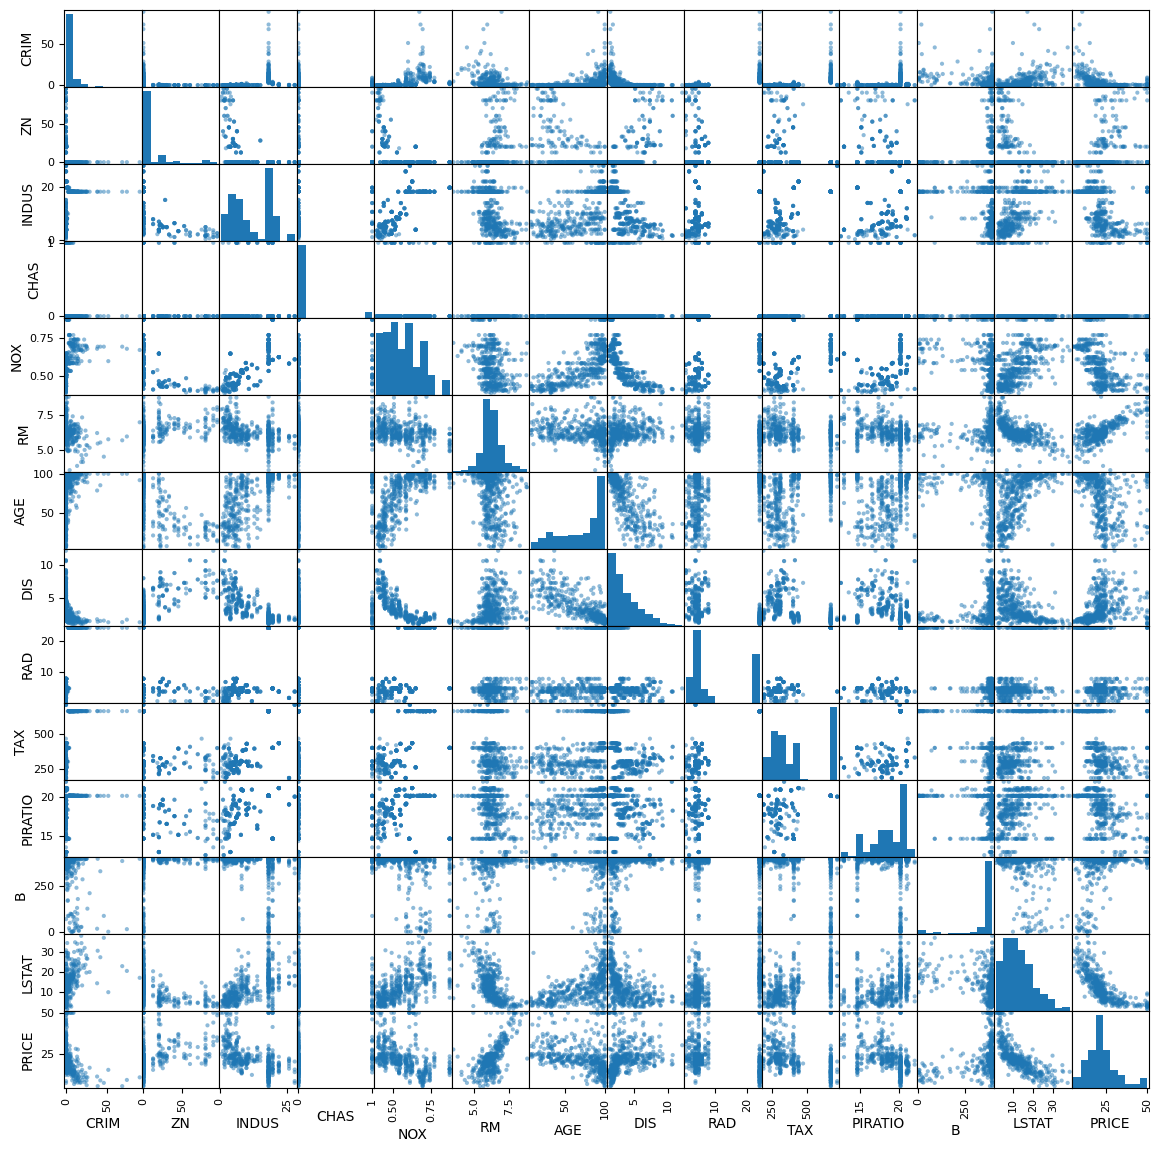

In [6]:
# 多欄位彼此關係
from pandas.plotting import scatter_matrix
_=scatter_matrix(data,figsize=(14,14))

In [7]:
# 求出四分位距(IQR)=Q3-Q1與上邊界(天花板)和下邊界(地板)
Q1=d['PRICE'].quantile(0.25)
Q3=d['PRICE'].quantile(0.75)
IQR=Q3-Q1
Upper=Q3+1.5*IQR
Lower=Q1-1.5*IQR
print('Q3=',Q3,'Q1=',Q1,'IQR=',IQR,'Upper=',Upper,'Lower=',Lower)

Q3= 24.8 Q1= 16.45 IQR= 8.350000000000001 Upper= 37.325 Lower= 3.924999999999997


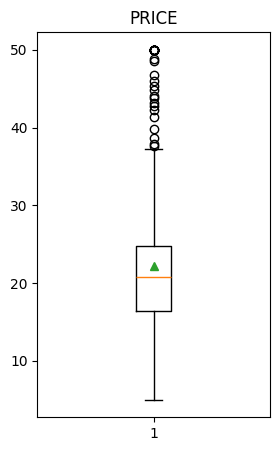

In [8]:
#合鬚圖
plt.figure(figsize=(3,5))
plt.boxplot(d['PRICE'],showmeans=True)
plt.title('PRICE')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1300\2204470728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['PRICE'])


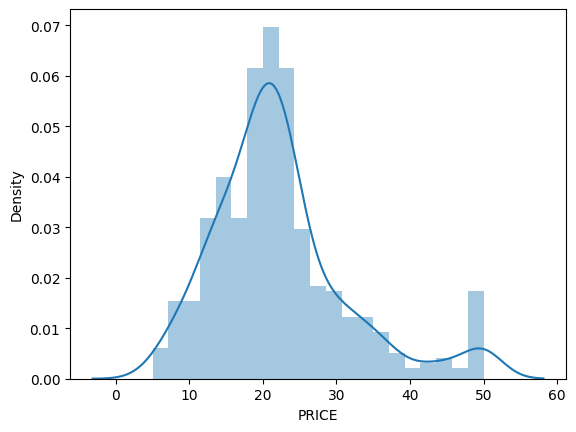

In [9]:
sns.distplot(d['PRICE'])
plt.show()

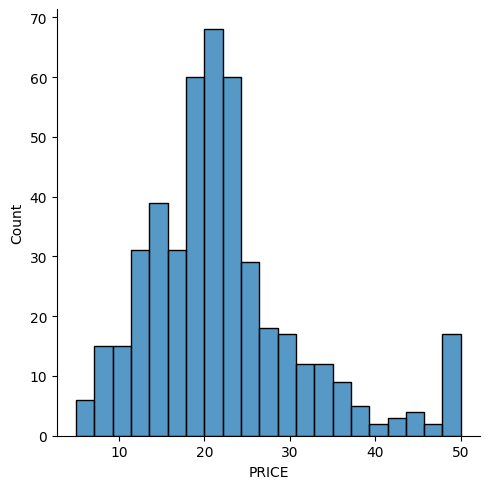

In [10]:
#常態分佈圖
sns.displot(d['PRICE'])
plt.show()

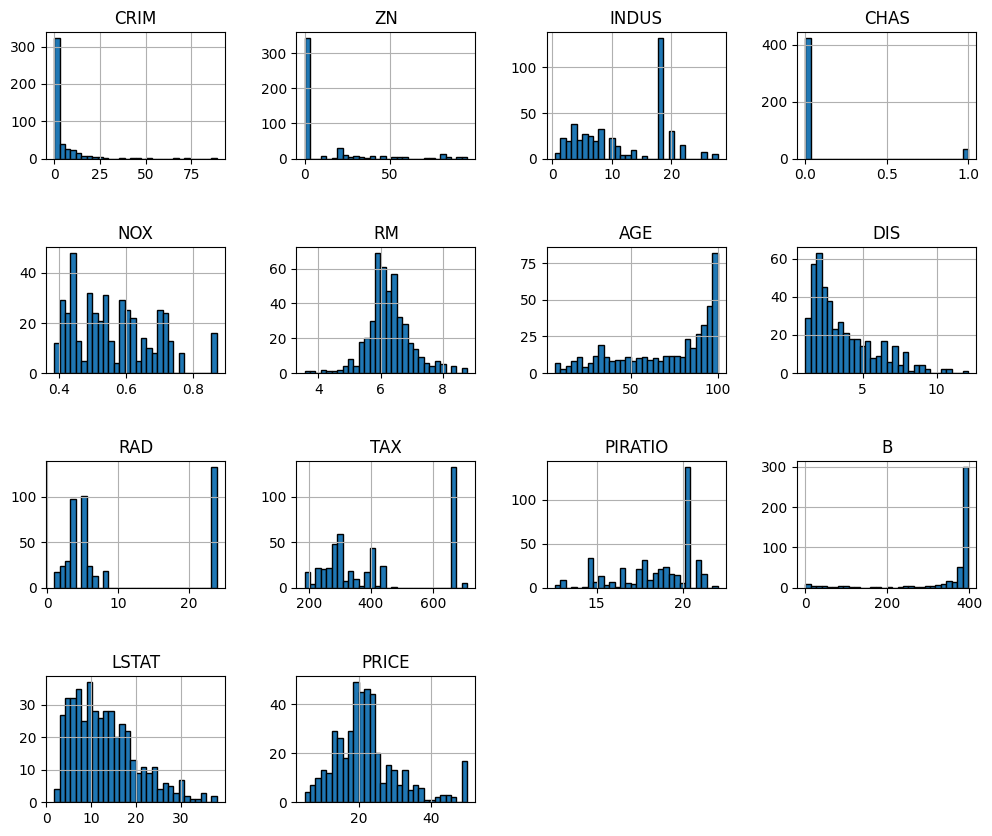

In [11]:
# 直方圖特徵分佈
d.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [12]:
#7. 皮爾森(Pearson) 相關係數
featuresCorr = d.corr()
featuresCorr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.205632,0.393648,-0.063570,0.411682,-0.220061,0.352572,-0.374492,0.618479,0.576025,0.295547,-0.376427,0.459179,-0.396399
ZN,-0.205632,1.000000,-0.547377,-0.040380,-0.524176,0.323751,-0.593847,0.689340,-0.324597,-0.326639,-0.384478,0.177723,-0.419877,0.371222
INDUS,0.393648,-0.547377,1.000000,0.057280,0.763555,-0.385453,0.658030,-0.706997,0.584828,0.710938,0.379742,-0.346107,0.603247,-0.480399
CHAS,-0.063570,-0.040380,0.057280,1.000000,0.090169,0.106596,0.080590,-0.089910,-0.017006,-0.044141,-0.136945,0.057294,-0.065662,0.195238
NOX,0.411682,-0.524176,0.763555,0.090169,1.000000,-0.306766,0.731362,-0.765282,0.605601,0.666606,0.185077,-0.373051,0.587855,-0.437933
RM,-0.220061,0.323751,-0.385453,0.106596,-0.306766,1.000000,-0.242714,0.214605,-0.215386,-0.287723,-0.344080,0.123747,-0.608875,0.669990
AGE,0.352572,-0.593847,0.658030,0.080590,0.731362,-0.242714,1.000000,-0.767679,0.456682,0.512556,0.264659,-0.271744,0.588139,-0.387366
DIS,-0.374492,0.689340,-0.706997,-0.089910,-0.765282,0.214605,-0.767679,1.000000,-0.488798,-0.528311,-0.236137,0.285021,-0.502574,0.259980
RAD,0.618479,-0.324597,0.584828,-0.017006,0.605601,-0.215386,0.456682,-0.488798,1.000000,0.912462,0.486445,-0.435313,0.494911,-0.394492
TAX,0.576025,-0.326639,0.710938,-0.044141,0.666606,-0.287723,0.512556,-0.528311,0.912462,1.000000,0.483593,-0.432537,0.547513,-0.472499


<Axes: >

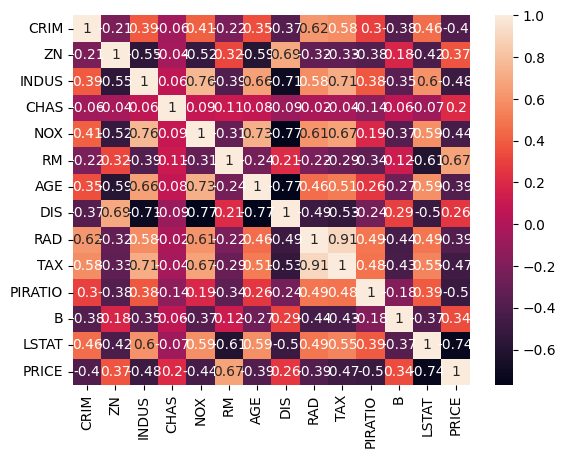

In [13]:
# 熱力圖
correlation_matrix = data.corr().round(2)
# .round(2) 將計算出的相關係數四捨五入到小數點後兩位
# annot = True 讓我們可以把數字標進每個格子裡
sns.heatmap(data=correlation_matrix, annot = True)

In [14]:
target = featuresCorr.iloc[:, -1]
target

CRIM      -0.396399
ZN         0.371222
INDUS     -0.480399
CHAS       0.195238
NOX       -0.437933
RM         0.669990
AGE       -0.387366
DIS        0.259980
RAD       -0.394492
TAX       -0.472499
PIRATIO   -0.502491
B          0.338793
LSTAT     -0.742985
PRICE      1.000000
Name: PRICE, dtype: float64

In [15]:
targetCorr = featuresCorr['PRICE']
targetCorr = targetCorr.drop('PRICE')
selectedFeatures = targetCorr[abs(targetCorr) > 0.51]
print("選擇特徵數： {} \n選擇特徵:\n{}".
      format(len(selectedFeatures), selectedFeatures))

選擇特徵數： 2 
選擇特徵:
RM       0.669990
LSTAT   -0.742985
Name: PRICE, dtype: float64


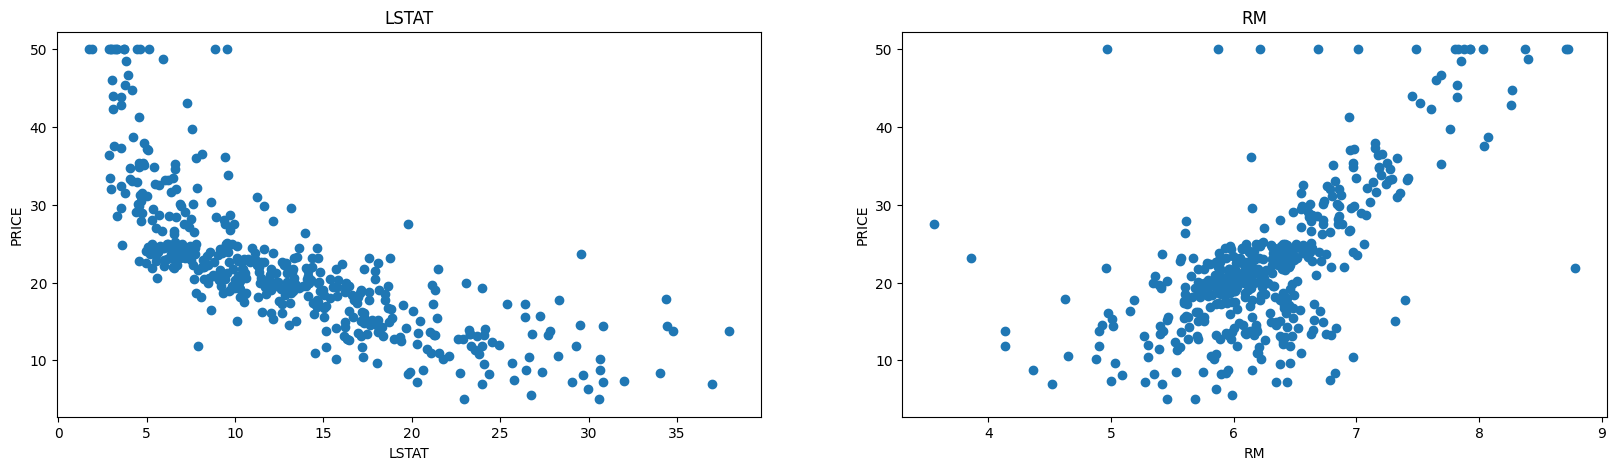

In [19]:
# LSTAT和RM與房價的線性關係
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM']
target = data['PRICE']  # This should work now

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

plt.show()
# LSTAT和PRICE是負向關係
# RM和PRICE正向關係

In [10]:
# 8. 資料分割
import pandas as pd
from sklearn.model_selection import train_test_split

# 查看 DataFrame 的欄位名稱
print(df.columns)

X = df.drop('PRICE', axis=1).values
y = df['PRICE'].values

# 分割成訓練集和測試集
print('原始_特徵：{}, 原始_目標：{}'.
      format(X.shape, y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('訓練_特徵：{}, 訓練_目標：{}'.
      format(X_train.shape, y_train.shape))
print('測試_特徵：{}, 測試_目標：{}'.
      format(X_test.shape, y_test.shape))




Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PIRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')
原始_特徵：(455, 13), 原始_目標：(455,)
訓練_特徵：(364, 13), 訓練_目標：(364,)
測試_特徵：(91, 13), 測試_目標：(91,)


In [3]:
# 9. Scikit-Learn 的K近鄰模組(KNN演算法)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

# 假設特徵變量為所有列（最後一列為目標變量）
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

# 特徵變數為"'RM'、'LSTAT'
X = df[['RM', 'LSTAT']].values
y = df['PRICE'].values

# 將數據分為訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化數據
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# 使用K近鄰演算法
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

# 顯示結果
print('  目標值：{}'.format(y_test))
print('預測結果：{}'.format(y_predict))
print('均方誤差：{}'.format(mean_squared_error(y_test, y_predict)))
print('  準確率：{}'.format(knn.score(x_test, y_test)))

  目標值：[22.9 23.4 17.1 20.  23.2 20.1 32.  20.5 13.  21.2 25.  50.  50.   7.2
 27.5 20.  34.9 20.9 19.  19.3 43.8 19.4 50.  13.3 21.9 24.3 27.5 21.8
 18.2 16.1 14.5 29.1 19.1 15.6 18.3 38.7 23.1 50.  13.8 33.2 19.3 22.8
 23.2 20.6 22.6 21.4 22.  36.5 16.4 31.2 11.5 16.6 33.1 14.1 50.  22.1
 23.1 12.6 13.6  8.1 28.7 24.  21.  13.3 26.6 20.8 12.  23.9 12.1 31.5
 21.4 11.7 18.9 23.7 31.  19.6 24.7 20.3 24.5 17.1 24.4 20.6 16.5 13.2
 16.  15.2 21.2 24.3 18.5 21.2 29.4]
預測結果：[24.24 18.2  13.84 20.48 20.68 22.8  34.78 18.92 13.84 24.3  24.34 47.28
 42.46 12.82 18.6  21.38 34.1  20.26 20.92 22.92 48.78 18.52 20.34 11.92
 47.28 24.9  25.7  19.9  20.78 18.14 14.36 24.14 18.92 18.   19.6  46.48
 24.16 19.46  8.36 35.16 20.06 25.92 18.72 27.7  20.26 21.42 23.22 33.38
 14.14 35.98 15.94 17.76 31.52 17.   48.78 24.04 18.7  17.74 13.82 12.32
 24.46 28.68 19.92 16.22 32.6  25.44 14.02 24.9  14.1  26.88 22.54 15.34
 21.   10.58 28.98 22.8  24.18 18.18 20.66 18.72 22.64 19.12 24.68  9.24
 19.54 13.32 19

In [4]:
# 10.載入GridSearchCV網格搜索模組,找出最佳參數組合
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 特徵和目標變量
X = df[['RM', 'LSTAT']].values
y = df['PRICE'].values

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化數據
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 設定KNN回歸模型和GridSearchCV的參數網格
param_grid = {
    'n_neighbors': [3, 5, 8, 10],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# 訓練GridSearchCV
grid_search.fit(X_train, y_train)

# 最佳得分和最佳參數
print('最佳得分 (負均方誤差): {:.2f}'.format(grid_search.best_score_))
print('最佳參數:', grid_search.best_params_)

# 使用最佳模型進行預測
best_knn = grid_search.best_estimator_
y_predict = best_knn.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('均方誤差 (MSE):', mse)
print('決定係數 (R^2):', r2)

# 顯示部分預測結果對比
print('目標值：', y_test[:10])
print('預測值：', y_predict[:10])


最佳得分 (負均方誤差): -17.11
最佳參數: {'n_neighbors': 8, 'weights': 'uniform'}
均方誤差 (MSE): 39.744201579670325
決定係數 (R^2): 0.5342674934810245
目標值： [22.9 23.4 17.1 20.  23.2 20.1 32.  20.5 13.  21.2]
預測值： [25.     19.5125 13.6375 19.475  21.1    22.0125 37.5375 18.05   13.6375
 22.775 ]


c:\Users\user\miniconda3\envs\venv2\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [5]:
# 11.使用決策樹分析
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# 假設 'selectedFeatures' 包含你要選取的欄位名稱：
selectedFeatures = ['LSTAT', 'RM']  # 更換成你實際的欄位名稱

x = df[selectedFeatures]
y = df['PRICE']

# 如果需要填充空值，可以執行以下操作（取消註解並根據需要調整）：
# x['age'].fillna(x['age'].mean(), inplace=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 使用 DictVectorizer 將資料轉換為決策樹可以處理的格式
dict = DictVectorizer(sparse=False)
x_train = x_train.to_dict(orient='records')
x_train = dict.fit_transform(x_train)
x_test = x_test.to_dict(orient='records')
x_test = dict.transform(x_test)

print('訓練資料：')
print(x_train)
print('onehot 特徵名稱：')
print(dict.get_feature_names_out())


訓練資料：
[[34.37   4.628]
 [19.52   6.406]
 [25.68   5.036]
 [13.99   6.317]
 [ 5.49   7.241]
 [17.44   6.749]
 [16.29   6.167]
 [ 6.36   7.163]
 [ 7.19   6.482]
 [ 2.98   6.854]
 [10.21   5.682]
 [17.64   6.348]
 [ 5.68   6.563]
 [ 4.81   7.249]
 [14.81   5.986]
 [ 6.58   7.691]
 [13.22   6.209]
 [ 3.59   6.438]
 [ 3.7    7.929]
 [ 7.26   7.52 ]
 [ 6.12   6.415]
 [ 5.77   6.383]
 [ 8.47   5.834]
 [ 7.9    6.266]
 [13.61   5.731]
 [11.64   5.854]
 [24.1    6.162]
 [ 8.93   6.616]
 [30.81   5.399]
 [13.15   5.741]
 [18.66   5.836]
 [18.03   6.185]
 [13.33   3.863]
 [ 7.43   6.162]
 [14.65   6.376]
 [ 7.22   6.619]
 [ 4.97   6.345]
 [14.1    5.648]
 [ 9.42   6.727]
 [14.98   6.114]
 [23.69   6.38 ]
 [ 9.81   6.101]
 [31.99   5.   ]
 [23.98   5.404]
 [ 7.51   6.167]
 [15.12   6.129]
 [ 4.59   6.943]
 [ 9.16   6.108]
 [18.8    6.03 ]
 [29.68   5.093]
 [10.19   5.362]
 [ 5.33   6.546]
 [ 6.86   6.145]
 [14.66   6.064]
 [19.31   6.417]
 [ 6.59   6.24 ]
 [ 5.52   6.065]
 [ 6.05   7.267]
 [11.72 

In [7]:
# 進行資料測試,並計算準確率:
dec = DecisionTreeRegressor()
dec.fit(x_train, y_train)
score = dec.score(x_test, y_test)
print(score)

0.6358826392559165


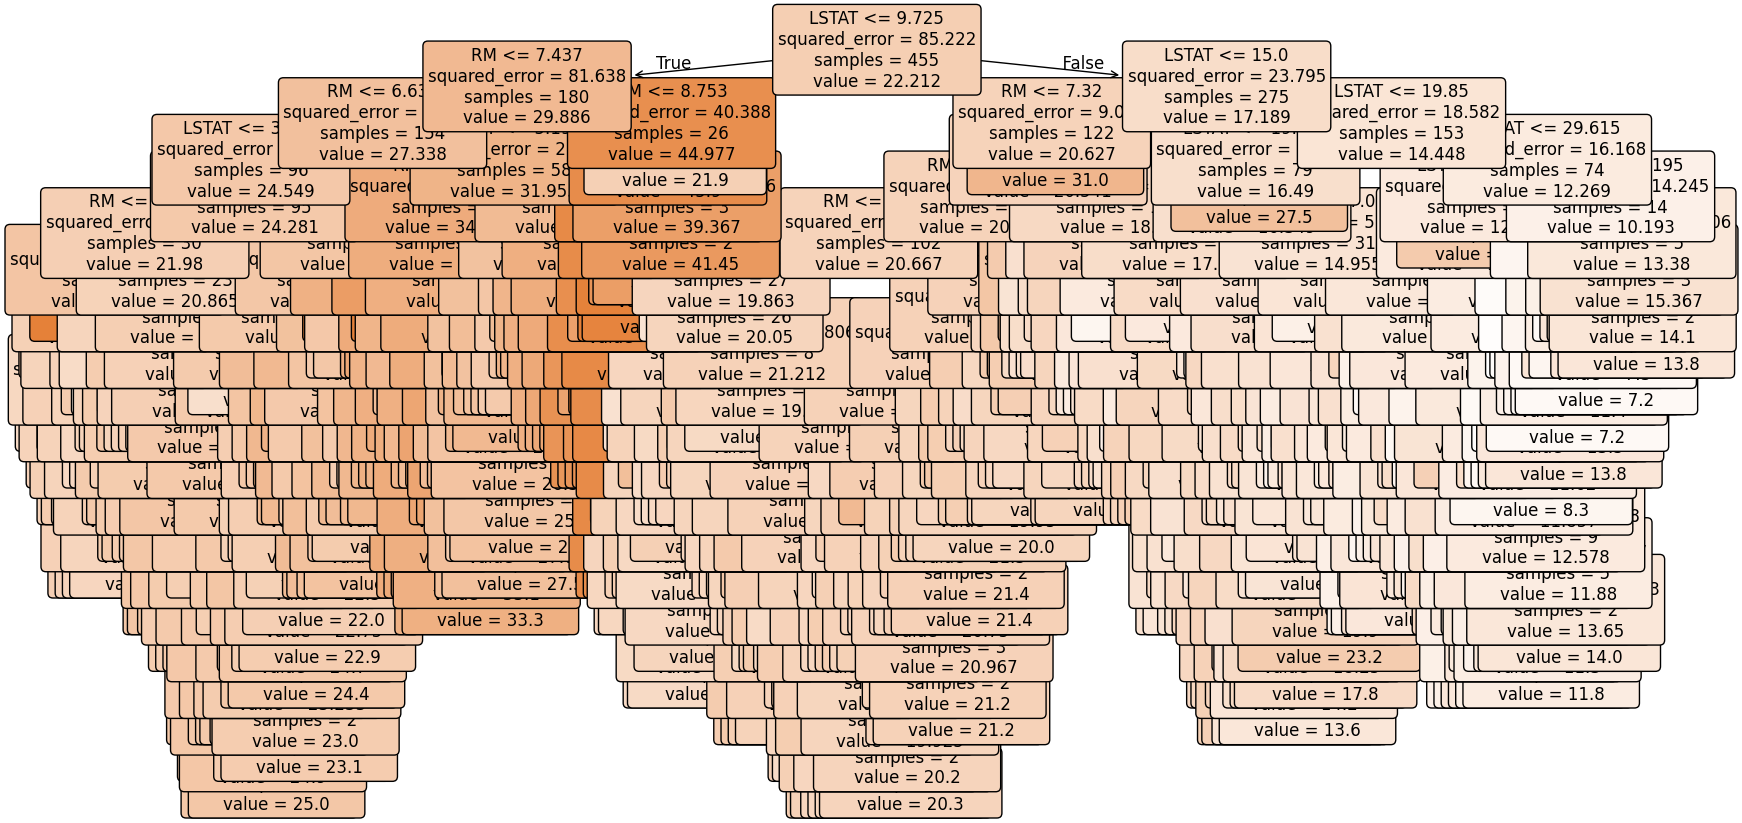

In [15]:
from sklearn import tree
selectedFeatures = ['LSTAT', 'RM']
X = df[selectedFeatures]
y = df["PRICE"]

# 使用 DecisionTreeRegressor 進行回歸分析
regressor = tree.DecisionTreeRegressor()
regressor = regressor.fit(X, y)

# 可視化決策樹
plt.figure(figsize=(20,10))  # 設置圖形大小
tree.plot_tree(regressor, feature_names=selectedFeatures, filled=True, rounded=True, fontsize=12)
plt.show()

In [21]:
# 12. 未完成只有做到準確度，評分(精準率、召回率、準確度)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import a regression model instead of LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df[selectedFeatures]
y = df['PRICE']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1) #R^2確認範圍，再調整random_state
    #在random_state=1
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# Use Linear Regression for continuous target
estimator = LinearRegression()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)

# Evaluate using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 38.056733022950645
R-squared: 0.5539522453363033
